In [28]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("anomaly_scores.csv")
df.head()

,url_length,num_slashes,has_query,is_static,is_api,is_post,is_error,hour,is_night,requests_per_ip,unique_urls_per_ip,error_rate_per_ip,avg_size_per_ip,bot_ratio_per_ip,size,anomaly_score,anomaly_label
0,166,2,0,0,1,0,0,3,1,6,6,0.000000,31859.500000,1.0,30577,0.018178,1
1,33,4,0,0,0,0,0,3,1,78,72,0.000000,10989.923077,0.0,5667,0.158621,1
2,33,4,0,0,0,0,0,3,1,78,72,0.000000,10989.923077,0.0,5379,0.159592,1
3,33,4,0,0,0,0,0,3,1,14,14,0.000000,10484.785714,1.0,1696,0.079915,1
4,146,4,0,0,0,0,0,3,1,3299,3144,0.001819,41566.940588,0.0,41483,0.021505,1


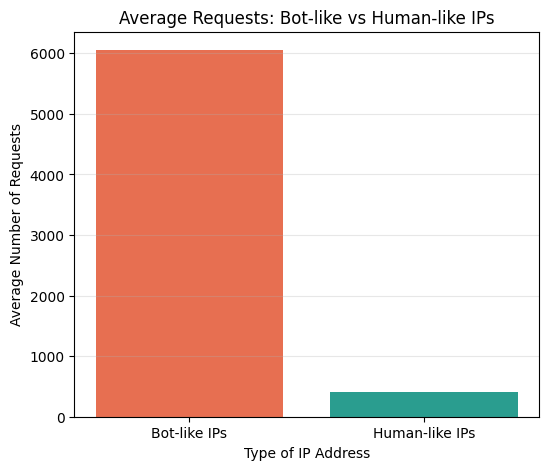

In [48]:
bot = df[df['bot_ratio_per_ip'] > 0.5]['requests_per_ip'].mean()
human = df[df['bot_ratio_per_ip'] <= 0.5]['requests_per_ip'].mean()

plt.figure(figsize=(6,5))
plt.bar(['Bot-like IPs', 'Human-like IPs'],
        [bot, human],
        color=['#E76F51', '#2A9D8F'])

plt.title("Average Requests: Bot-like vs Human-like IPs")
plt.xlabel("Type of IP Address")
plt.ylabel("Average Number of Requests")

plt.grid(axis='y', alpha=0.3)
plt.savefig("bot_vs_human_requests.png")
plt.show()

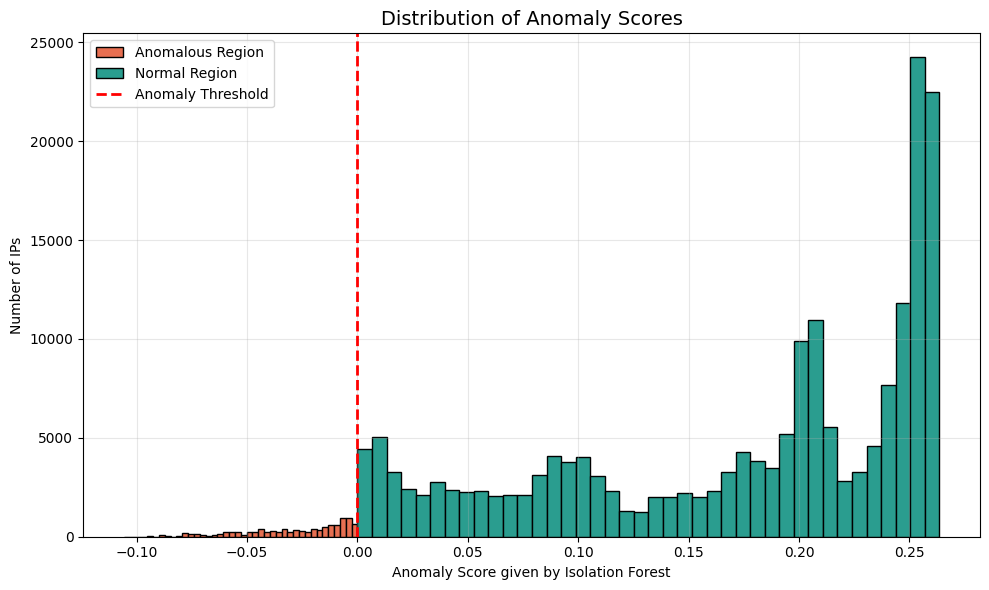

In [51]:
scores = df['anomaly_score']
threshold = 0

anomaly_scores = scores[scores < threshold]
normal_scores = scores[scores >= threshold]

plt.figure(figsize=(10,6))

plt.hist(anomaly_scores, bins=40, color="#E76F51", edgecolor='black', label='Anomalous Region')
plt.hist(normal_scores, bins=40, color="#2A9D8F", edgecolor='black', label='Normal Region')

plt.axvline(threshold, color='red', linestyle='--', linewidth=2, label='Anomaly Threshold')

plt.title("Distribution of Anomaly Scores", fontsize=14)
plt.xlabel("Anomaly Score given by Isolation Forest")
plt.ylabel("Number of IPs")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig("anomaly_score_distribution.png", dpi=300)
plt.show()

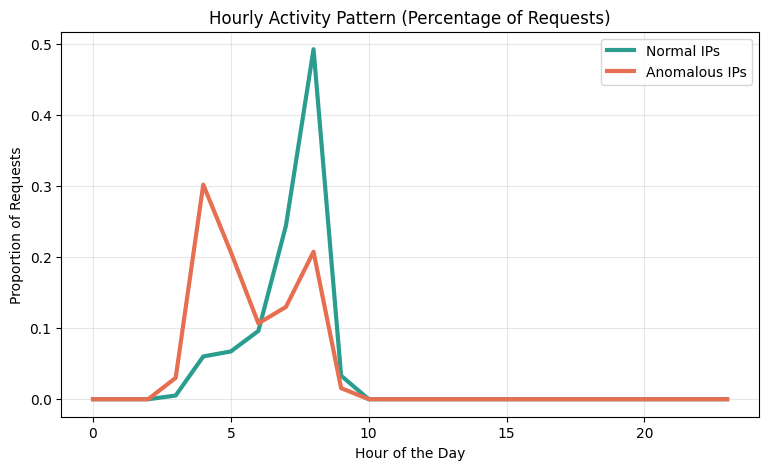

In [49]:
import numpy as np

normal = df[df['anomaly_label']==1]
anom = df[df['anomaly_label']==-1]

normal_hour = normal['hour'].value_counts(normalize=True).sort_index()
anom_hour = anom['hour'].value_counts(normalize=True).sort_index()

hours = np.arange(24)

plt.figure(figsize=(9,5))

plt.plot(hours, normal_hour.reindex(hours, fill_value=0),
         label='Normal IPs', color='#2A9D8F', linewidth=3)

plt.plot(hours, anom_hour.reindex(hours, fill_value=0),
         label='Anomalous IPs', color='#E76F51', linewidth=3)

plt.title("Hourly Activity Pattern (Percentage of Requests)")
plt.xlabel("Hour of the Day")
plt.ylabel("Proportion of Requests")
plt.legend()
plt.grid(alpha=0.3)

plt.savefig("activity_by_hour.png")
plt.show()


/tmp/ipython-input-1300091820.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(


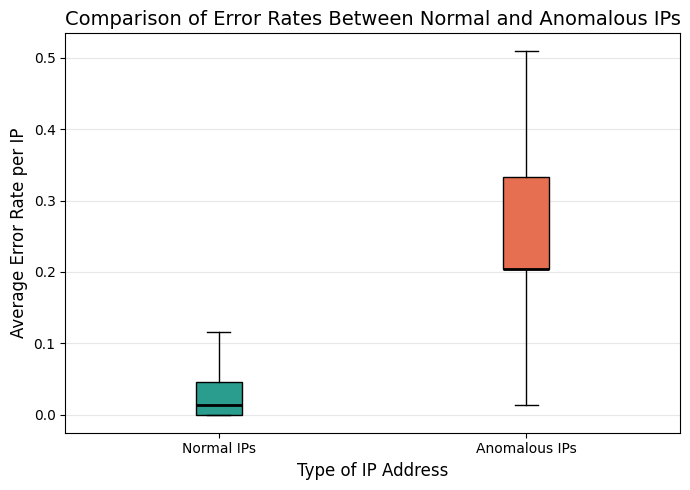

In [50]:
plt.figure(figsize=(7,5))

box = plt.boxplot(
    [normal_err, anom_err],
    labels=["Normal IPs", "Anomalous IPs"],
    showfliers=False,
    patch_artist=True
)

colors = ["#2A9D8F", "#E76F51"]
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)


for median in box['medians']:
    median.set_color("black")
    median.set_linewidth(2)

plt.title("Comparison of Error Rates Between Normal and Anomalous IPs", fontsize=14)

plt.xlabel("Type of IP Address", fontsize=12)
plt.ylabel("Average Error Rate per IP", fontsize=12)

plt.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.savefig("error_rate_comparison.png")
plt.show()